# Titanic Prediction using K-nearest neighbor (kNN) classifier

## 1. Defining the Question

### a) Specifying the Question

### b) Defining the Metric for Success

### c) Understanding the context

### d). Recording the Experimental Design

### e) Data Relevance

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Reading the Data

In [2]:
titanic_train = pd.read_csv(r"C:\Users\HP\Desktop\Moringa_School_Projects\CORE\WK9_IP\titanic_train.csv")
titanic_test = pd.read_csv(r"C:\Users\HP\Desktop\Moringa_School_Projects\CORE\WK9_IP\titanic_test.csv")

#### Preview the datasets

In [3]:
# Titanic train

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Titanic test

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Checking the shape for the train dataset

titanic_train.shape

(891, 12)

In [6]:
# Checking the shape for the test dataset

titanic_test.shape

(418, 11)

In [7]:
# Checking the columns of the train dataset

titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Checking the columns of the test dataset

titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Describing the train dataset

titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Describing the test dataset

titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4. Cleaning the Dataset

### a). Checking for the Missing Values

In [12]:
# Checking on the Train dataset

total_missing_train = titanic_train.isnull().sum().sort_values(ascending=False)
percentage = (titanic_train.isnull().sum()/titanic_train.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total_missing_train,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [13]:
# Checking on the test dataset

total_missing_test = titanic_test.isnull().sum().sort_values(ascending=False)
percentage = (titanic_test.isnull().sum()/titanic_test.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total_missing_test,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


We can clearly see that the Cabin column has around 78% of missing values on both dataset. This will make of our
analysis to be incosistent if we impute values to the missing values. We shall therefore proceed to delete the
entire column on both datasets.

In [14]:
# Dropping the Cabin column from the train dataset

titanic_train = titanic_train.drop(['Cabin'],axis=1)

In [15]:
# Dropping the Cabin column from the test dataset

titanic_test = titanic_test.drop(['Cabin'],axis=1)

We shall drop the other missing values on other columns without dropping the entire columns on both datasets.

In [16]:
# Dropping Null on the train dataset

titanic_train = titanic_train.dropna()

In [17]:
# Dropping Null on the test dataset

titanic_test = titanic_test.dropna()

In [38]:
# Confirming there are no missing values

print(titanic_train.isnull().sum(),end='\n\n')
print(titanic_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### b). Checking for Duplicates

In [25]:
# Checking duplicates in the train dataset

titanic_train.duplicated().sum()

0

In [27]:
# Checking duplicates in the test dataset

titanic_test.duplicated().sum()

0

There are no duplicate values in both the datasets

### c). Checking the Datatypes

In [35]:
# Checking for the datasets

print(titanic_train.dtypes,end='\n\n')
print(titanic_test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


### d). Checking for Outliers

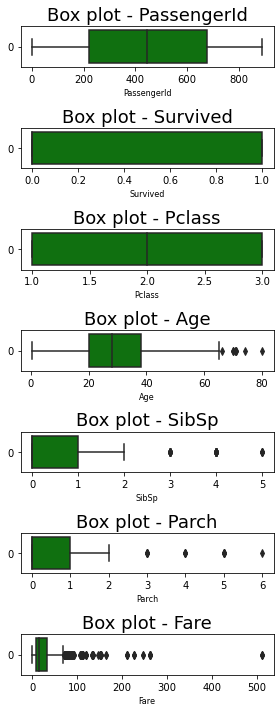

In [43]:
# Checking on the train dataset

# Plotting columns with numerical values only to check for outliers
col_names = titanic_train.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(len(col_names), figsize= (4,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = titanic_train[col_val], ax= ax[i], orient="h", color="green")
  titanic_train[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 18)
  ax[i].set_xlabel(col_val, fontsize= 8)
  
plt.tight_layout()  
plt.show()

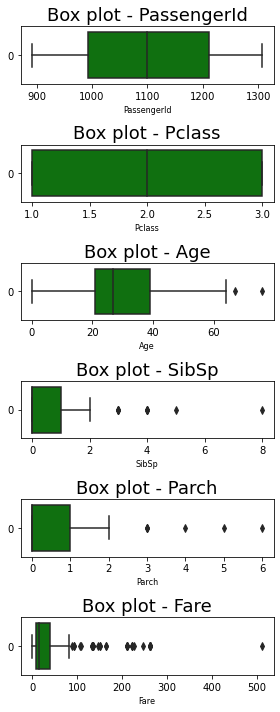

In [44]:
# Checking on the test dataset

# Plotting columns with numerical values only to check for outliers
col_names = titanic_test.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(len(col_names), figsize= (4,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = titanic_test[col_val], ax= ax[i], orient="h", color="green")
  titanic_test[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 18)
  ax[i].set_xlabel(col_val, fontsize= 8)
  
plt.tight_layout()  
plt.show()

In [49]:
# Removing outliers using IQR method on the train dataset
# ---
# Define the outliers range 
Q3 = titanic_train[col_names].quantile(0.75)
Q1 = titanic_train[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = titanic_train[col_names][((titanic_train[col_names] < (Q1 - 1.5 * IQR))
 |(titanic_train[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
i = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(titanic_train))*100

# The total number of outliers
print(f"The total number of outliers are {i}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (148, 6). Which translates to 20.786516853932586% of the data.


In [46]:
# Removing outliers using IQR method on the test dataset
# ---
# Define the outliers range 
Q3 = titanic_test[col_names].quantile(0.75)
Q1 = titanic_test[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = titanic_test[col_names][((titanic_test[col_names] < (Q1 - 1.5 * IQR))
 |(titanic_test[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
i = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(titanic_test))*100

# The total number of outliers
print(f"The total number of outliers are {i}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (47, 6). Which translates to 14.19939577039275% of the data.


## 5. Exploratory Data Analysis (EDA)

### a). Univariate Analysis